# Telecom Churn Case Study

### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To display more rows and columns
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 200

In [4]:
#reading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')

In [5]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [6]:
# dataframe summary
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [7]:
telecom.shape

(99999, 226)

In [8]:
# create backup of data
base = telecom.copy()

In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.[Month 6 & 7 in our case]

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)[Month 8 in our case]

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase. [Month 9 in our case]

### Handling Missing Values

In [9]:
# looking at missing value ratio in each column
telecom.isnull().sum()*100/telecom.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [10]:
# Checking all recharge columns
rech_cols = []
for col in list(telecom.columns):
    if ('rech' in col):
        rech_cols.append(col)

#adding arpu to recharge columns list
for col in list(telecom.columns):
    if ('arpu' in col):
        rech_cols.append(col)

In [11]:
#checking the created list
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_

In [12]:
# Imputing zeroes for all recharge columns

telecom[rech_cols]=telecom[rech_cols].apply(lambda x: x.fillna(0))

In [13]:
# Checking all date columns

date_cols = []
for col in list(telecom.columns):
    if ('date' in col):
        date_cols.append(col)

In [14]:
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [15]:
# imputing NA for all last date columns with last date of respective months.
telecom['last_date_of_month_7'].fillna('7/31/2014',inplace = True)
telecom['last_date_of_month_8'].fillna('8/31/2014',inplace = True)
telecom['last_date_of_month_9'].fillna('9/30/2014',inplace = True)

In [16]:
# Converting Date Series columns to useful information

telecom[date_cols] = telecom[date_cols].apply(pd.to_datetime)
telecom['duration_last_rech_6']= telecom['last_date_of_month_6']-telecom['date_of_last_rech_6']
telecom['duration_last_rech_7']= telecom['last_date_of_month_7']-telecom['date_of_last_rech_7']
telecom['duration_last_rech_8']= telecom['last_date_of_month_8']-telecom['date_of_last_rech_8']
telecom['duration_last_rech_9']= telecom['last_date_of_month_9']-telecom['date_of_last_rech_9']

telecom['duration_last_rech_6']=telecom['duration_last_rech_6'].astype(str)
telecom['duration_last_rech_6']=telecom['duration_last_rech_6'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_6']=='NaT'),'duration_last_rech_6']=0
telecom['duration_last_rech_6']=telecom['duration_last_rech_6'].astype(int)

telecom['duration_last_rech_7']=telecom['duration_last_rech_7'].astype(str)
telecom['duration_last_rech_7']=telecom['duration_last_rech_7'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_7']=='NaT'),'duration_last_rech_7']=0
telecom['duration_last_rech_7']=telecom['duration_last_rech_7'].astype(int)

telecom['duration_last_rech_8']=telecom['duration_last_rech_8'].astype(str)
telecom['duration_last_rech_8']=telecom['duration_last_rech_8'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_8']=='NaT'),'duration_last_rech_8']=0
telecom['duration_last_rech_8']=telecom['duration_last_rech_8'].astype(int)

telecom['duration_last_rech_9']=telecom['duration_last_rech_9'].astype(str)
telecom['duration_last_rech_9']=telecom['duration_last_rech_9'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_9']=='NaT'),'duration_last_rech_9']=0
telecom['duration_last_rech_9']=telecom['duration_last_rech_9'].astype(int)

telecom['duration_last_rech_data_6']= telecom['last_date_of_month_6']-telecom['date_of_last_rech_data_6']
telecom['duration_last_rech_data_7']= telecom['last_date_of_month_7']-telecom['date_of_last_rech_data_7']
telecom['duration_last_rech_data_8']= telecom['last_date_of_month_8']-telecom['date_of_last_rech_data_8']
telecom['duration_last_rech_data_9']= telecom['last_date_of_month_9']-telecom['date_of_last_rech_data_9']

telecom['duration_last_rech_data_6']=telecom['duration_last_rech_data_6'].astype(str)
telecom['duration_last_rech_data_6']=telecom['duration_last_rech_data_6'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_data_6']=='NaT'),'duration_last_rech_data_6']=0
telecom['duration_last_rech_data_6']=telecom['duration_last_rech_data_6'].astype(int)

telecom['duration_last_rech_data_7']=telecom['duration_last_rech_data_7'].astype(str)
telecom['duration_last_rech_data_7']=telecom['duration_last_rech_data_7'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_data_7']=='NaT'),'duration_last_rech_data_7']=0
telecom['duration_last_rech_data_7']=telecom['duration_last_rech_data_7'].astype(int)

telecom['duration_last_rech_data_8']=telecom['duration_last_rech_data_8'].astype(str)
telecom['duration_last_rech_data_8']=telecom['duration_last_rech_data_8'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_data_8']=='NaT'),'duration_last_rech_data_8']=0
telecom['duration_last_rech_data_8']=telecom['duration_last_rech_data_8'].astype(int)

telecom['duration_last_rech_data_9']=telecom['duration_last_rech_data_9'].astype(str)
telecom['duration_last_rech_data_9']=telecom['duration_last_rech_data_9'].str.split(" ",n=3,expand=True)[0]
telecom.loc[(telecom['duration_last_rech_data_9']=='NaT'),'duration_last_rech_data_9']=0
telecom['duration_last_rech_data_9']=telecom['duration_last_rech_data_9'].astype(int)

In [17]:
# dropping date columns

telecom=telecom.drop(date_cols, axis=1)
telecom.shape

(99999, 222)

In [18]:
# Listing all categorical columns

cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [19]:
# Imputing missing categories as -1

telecom[cat_cols]=telecom[cat_cols].apply(lambda x: x.fillna(-1))

In [20]:
# Checking all mou columns

mou_cols = []
for col in list(telecom.columns):
    if ('mou' in col):
        mou_cols.append(col)

In [21]:
mou_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [22]:
# Mode for all these columns is zero thus imputng with zero

for col in mou_cols:
    telecom[col].fillna(0,inplace = True)

In [23]:
# look at missing value ratio
round(telecom.isnull().sum()*100/telecom.shape[0],2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
onnet_mou_9                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
offnet_mou_9                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_ic_mou_9                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
roam_og_mou_9                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2t_mou_8             0.00
loc_og_t2t_mou_9             0.00
loc_og_t2m_mou

In [24]:
# Fetching all other columns

other_cols = []
for col in list(telecom.columns):
    if ('other' in col):
        other_cols.append(col)

In [25]:
# Mode for all these columns is zero thus imputng with zero

for col in other_cols:
    telecom[col].fillna(0,inplace = True)

## Calculating Churn

In [26]:
churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom[churn_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,189.214260,289.279198,44.719701,136.056613
std,284.823024,468.980002,198.653570,577.394194
min,0.000000,0.000000,0.000000,0.000000
25%,32.370000,25.510000,0.000000,0.000000
50%,105.890000,125.460000,0.000000,0.000000
75%,236.320000,353.480000,0.000000,0.000000
max,10796.590000,11517.730000,8993.950000,39221.270000


In [27]:
telecom['total_calls_mou_9'] = telecom['total_ic_mou_9'] + telecom['total_og_mou_9']
telecom['total_internet_mb_9'] =  telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']
telecom['churn'] = telecom.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [28]:
telecom.churn.describe()

count    99999.000000
mean         0.101911
std          0.302533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

### Filtering High value customers

In [29]:
# Total Amount Data

telecom['avg_rech_data_amt']=((telecom['count_rech_2g_6']+telecom['count_rech_3g_6'])*telecom['av_rech_amt_data_6'] + (telecom['count_rech_2g_7']+telecom['count_rech_3g_7'])*telecom['av_rech_amt_data_7'])/2 

In [30]:
telecom['avg_rech_amt']=(telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2

In [31]:
telecom['av_rech']=telecom['avg_rech_data_amt']+telecom['avg_rech_amt']

In [32]:
#filtering HV customers
telecom_hv = telecom.loc[telecom['av_rech']>telecom['av_rech'].quantile(0.7),:]

In [33]:
telecom_hv.shape

(29953, 228)

In [34]:
#churn data description after filtering High Value customers
telecom_hv.churn.describe()

count    29953.000000
mean         0.081227
std          0.273188
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

### Deleting data for 9th month

In [35]:
Sept_Cols = []
for col in list(telecom_hv.columns):
    if ('_9' in col):
        Sept_Cols.append(col)

In [36]:
len(Sept_Cols)

55

In [37]:
telecom_hv = telecom_hv.drop(Sept_Cols,axis=1)

In [38]:
telecom_hv.shape

(29953, 173)

### EDA

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
telecom_hv.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,churn,avg_rech_data_amt,avg_rech_amt,av_rech
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,9,15,23,9,15,23,1,252.0,307.0,559.0
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0

In [41]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_hv
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",showfliers=False)
    plt.show()

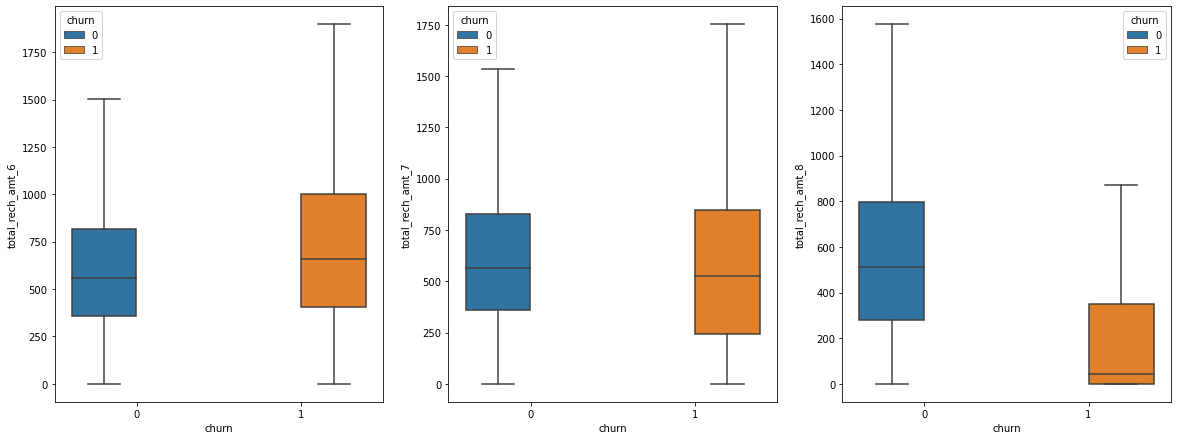

In [42]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

Analysis outcome --> We can see a considerable decline in the total recharge amount for churned customers in the August. (Action Phase).

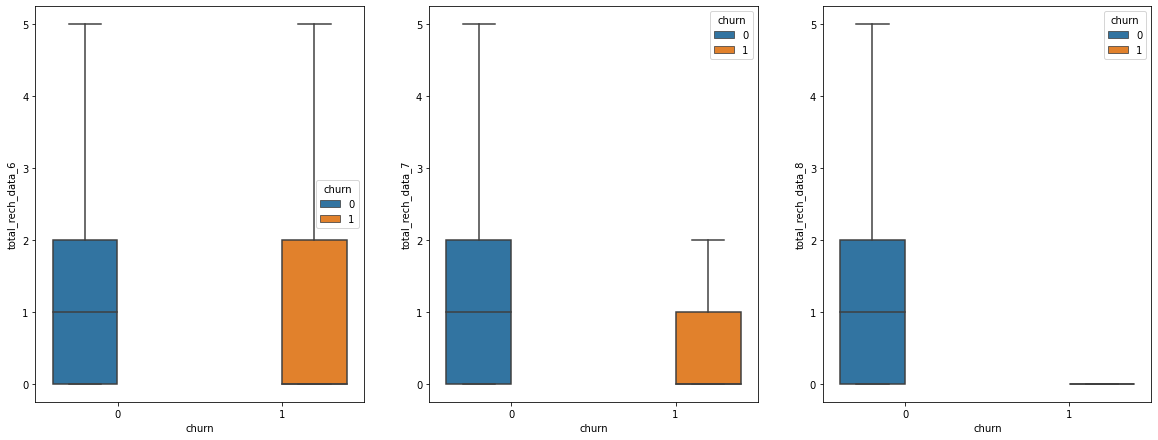

In [43]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_data')

Analysis outcome --> We can see a huge decline in the total data recharge amount for churned customers in the August. (Action Phase).

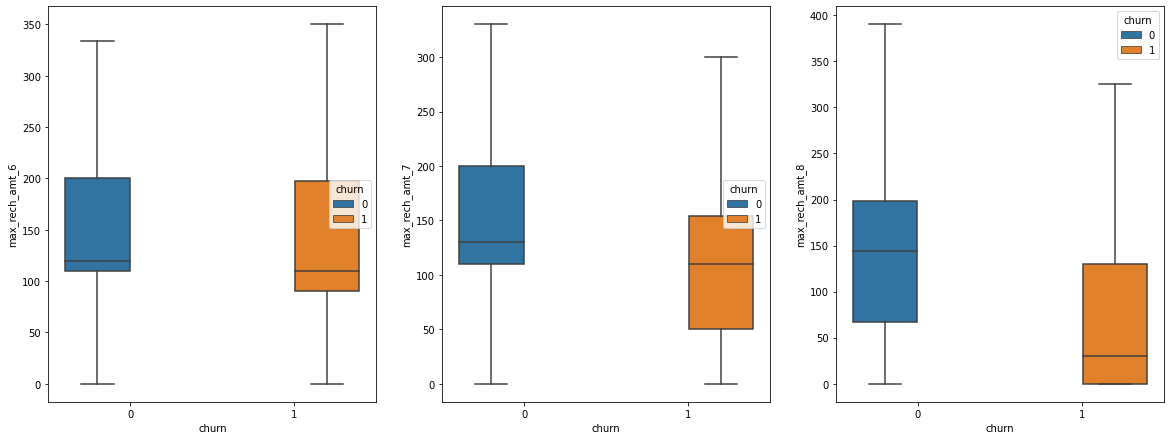

In [44]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

Analysis outcome --> We can see a huge decline in the maximum recharge amount for churned customers in the August. (Action Phase).

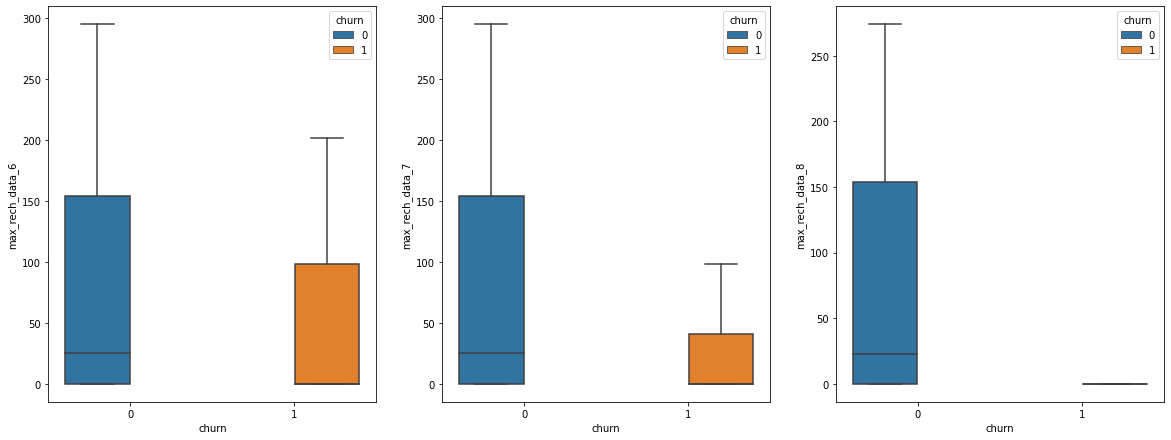

In [45]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

Analysis outcome --> We can see a huge decline in the maximum recharge data for churned customers in the August. (Action Phase).

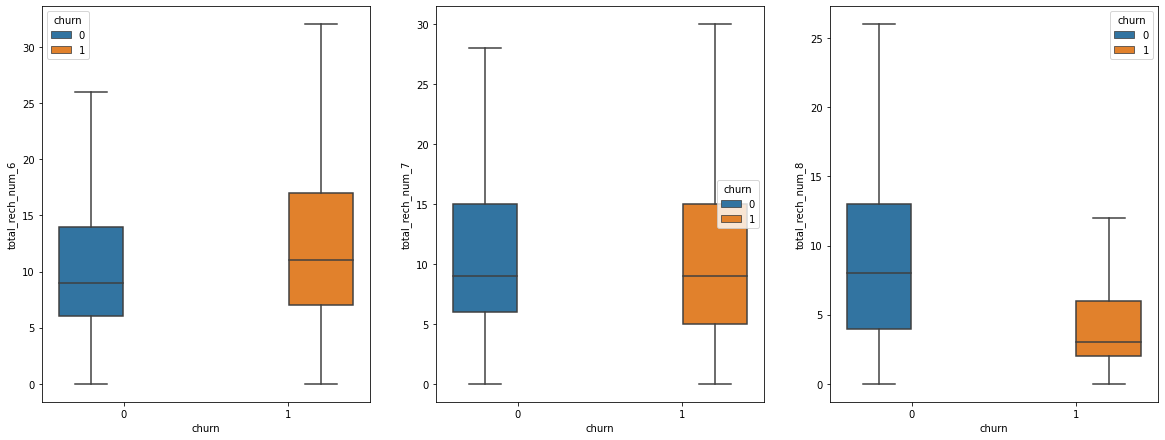

In [46]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

Analysis outcome --> We can see a huge decline in the total number of recharge for churned customers in the August. (Action Phase).

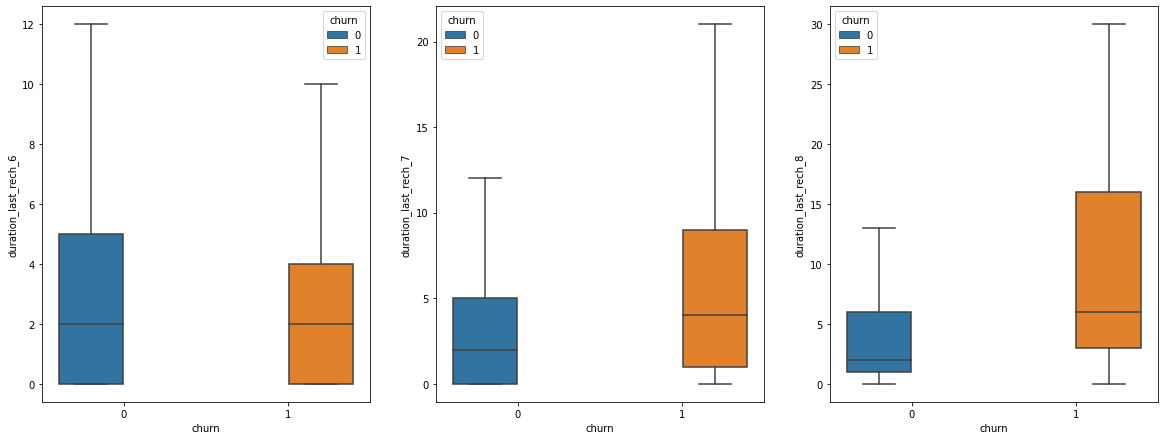

In [47]:
# Ploting for duration of last recharge:
plot_box_chart('duration_last_rech')

Analysis outcome --> We can see a considerable increase in the duration since last recharge for churned customers in the August. (Action Phase).

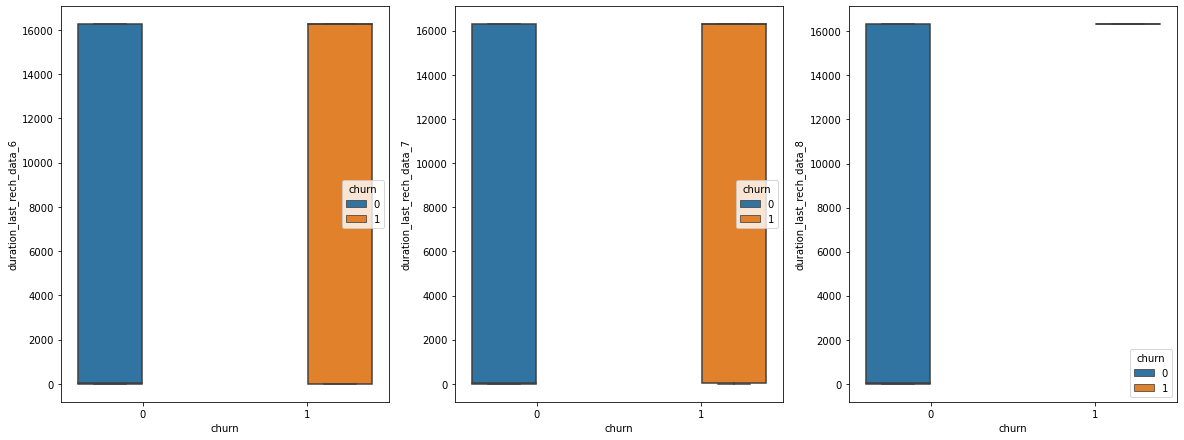

In [48]:
# Ploting for duration of last data recharge:
plot_box_chart('duration_last_rech_data')

Analysis outcome --> We can see a huge increase in the duration since last data recharge for churned customers in the August. (Action Phase).

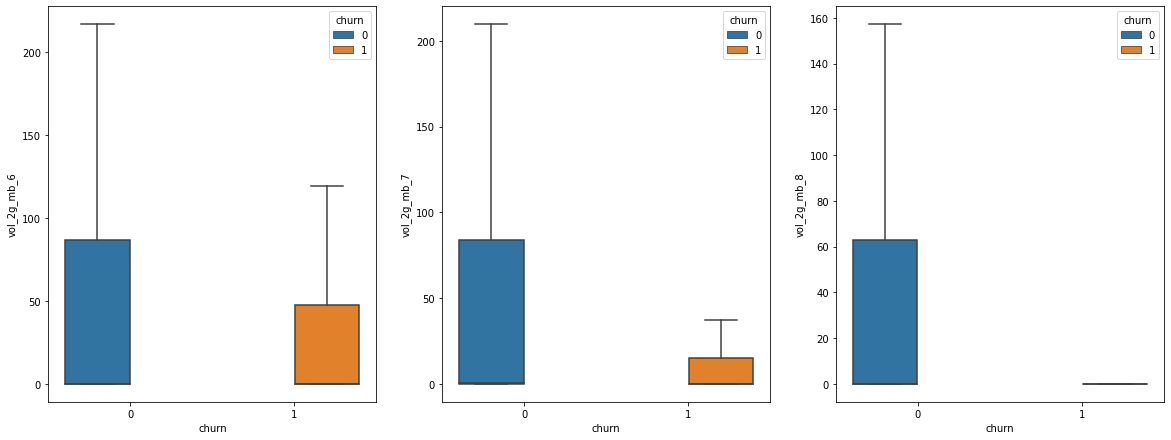

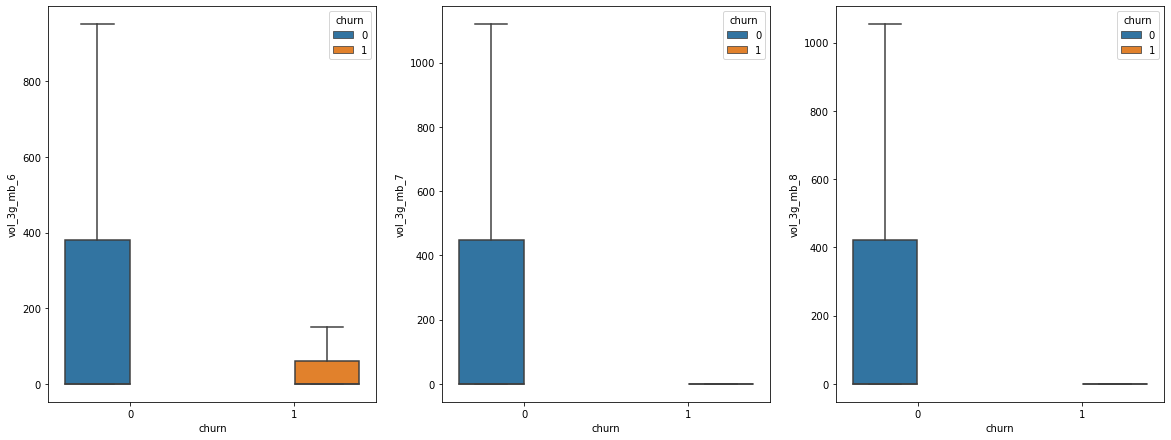

In [49]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')
plot_box_chart('vol_3g_mb')

As clearly visible from aove boxplot, There is almost no data 2G/3G usage in the action phase.(August)

In [50]:
# defining a function for creating heatmaps for different features.
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

#### Minutes of usage - Outgoing

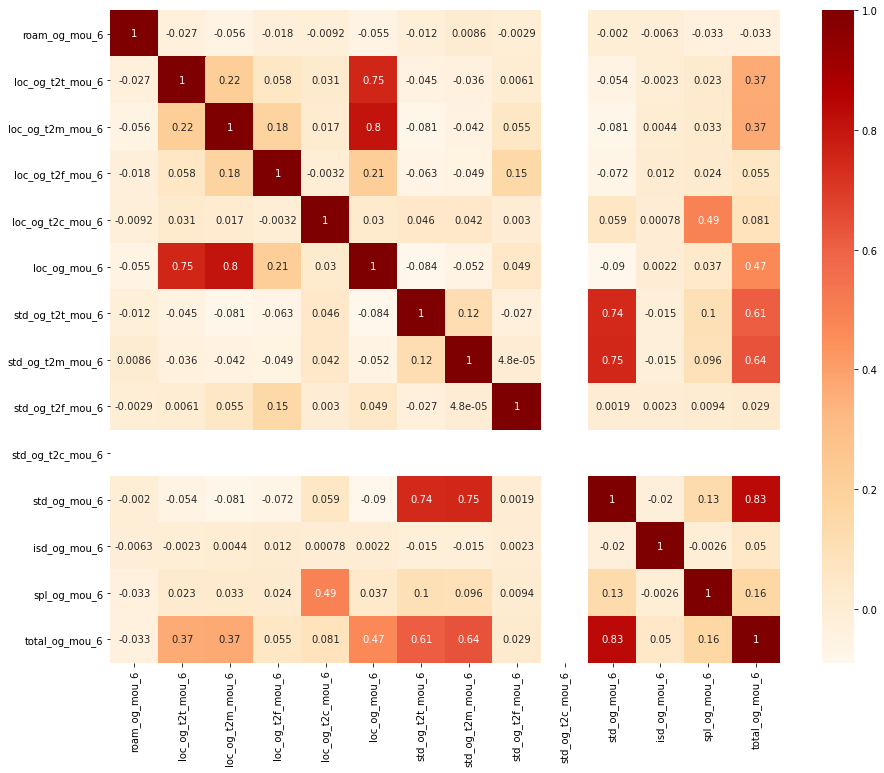

In [51]:
# Taking all Outgoing Minutes of Usage
mou_og_6_cols = telecom_hv.columns[telecom_hv.columns.str.contains('.*_og_.*mou_6',regex=True)]
heatmap(15,12,telecom_hv.filter(mou_og_6_cols))

Analysis outcome: We can see that some features have strong correlation with other features and they needs to be inspected to avoid any multicolinearity issues.

In [52]:
telecom_hv.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,churn,avg_rech_data_amt,avg_rech_amt,av_rech
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,9,15,23,9,15,23,1,252.0,307.0,559.0
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0

Checking if total_og_mou_6 is same as sum of loc_og_mou_6, std_og_mou_6, spl_og_mou_6, isd_og_mou_6, og_others_6

In [53]:
telecom_hv.loc[21,'total_og_mou_6']

860.34

In [54]:
telecom_hv.loc[21,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum()

860.3299999999999

Similarly Checking if std_og_mou_6 is same as sum of std_og_t2m_mou_6, std_og_t2t_mou_6, std_og_t2f_mou_6, std_og_loc_mou_6

In [55]:
telecom_hv.loc[21,'std_og_mou_6']

763.29

In [56]:
telecom_hv.loc[21,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_t2c_mou_6']].sum()

763.29

Similarly Checking if loc_og_mou_6 is same as sum of loc_og_t2m_mou_6, loc_og_t2t_mou_6, loc_og_t2f_mou_6, loc_og_t2c_mou_6

In [57]:
telecom_hv.loc[21,'loc_og_mou_6']

97.04

In [58]:
telecom_hv.loc[21,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6']].sum()

97.04

Analysis outcome: We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other features present in dataset.So we can remove these columns for all months from the data set.

In [59]:
mou_og_cols = telecom_hv.columns[telecom_hv.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
telecom_hv.drop(mou_og_cols,axis=1,inplace=True)
mou_og_cols.tolist()

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

#### Minutes of usage - Incoming

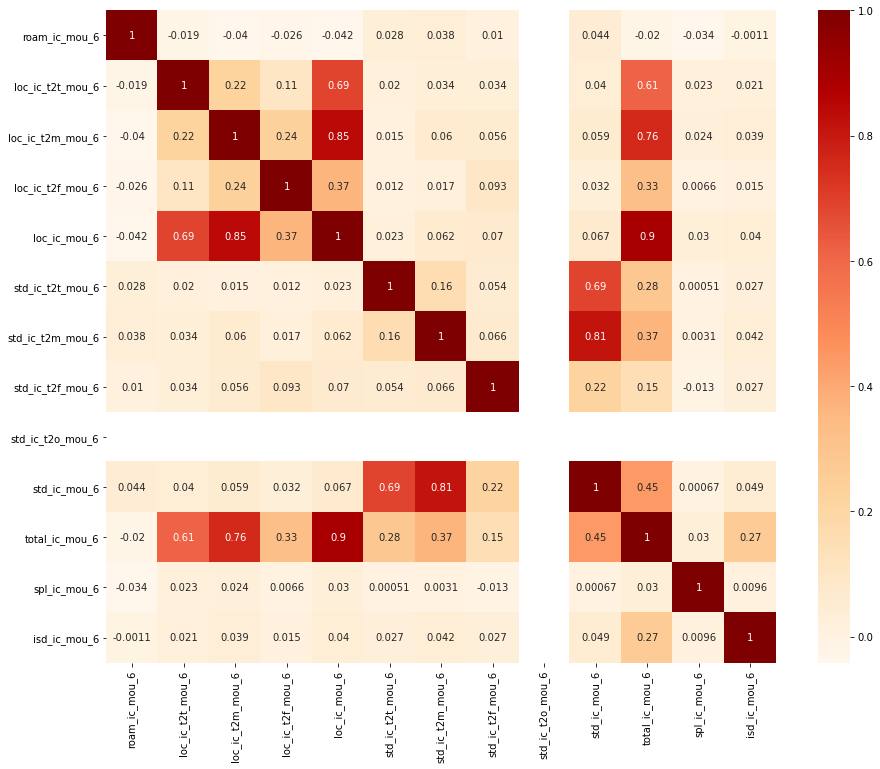

In [60]:
# Taking all Incoming Minutes of Usage
mou_ic_6_cols = telecom_hv.columns[telecom_hv.columns.str.contains('.*_ic_.*mou_6',regex=True)]
heatmap(15,12,telecom_hv.filter(mou_ic_6_cols))

Analysis outcome: We can see that some features have strong correlation with other features and they needs to be inspected to avoid any multicolinearity issues.

Checking if total_ic_mou_6 is same as sum of loc_ic_mou_6, std_ic_mou_6, spl_ic_mou_6, isd_ic_mou_6, ic_others_6

In [61]:
telecom_hv['std_ic_t2o_mou_6'].value_counts()

0.0    29953
Name: std_ic_t2o_mou_6, dtype: int64

In [62]:
telecom_hv.loc[21,'total_ic_mou_6']

207.09

In [63]:
telecom_hv.loc[21,['loc_ic_mou_6','std_ic_mou_6','spl_ic_mou_6','isd_ic_mou_6','ic_others_6']].sum()

207.09

Similarly Checking if std_ic_mou_6 is same as sum of std_ic_t2m_mou_6, std_ic_t2t_mou_6, std_ic_t2f_mou_6, std_ic_loc_mou_6

In [64]:
telecom_hv.loc[21,'std_ic_mou_6']

81.76

In [65]:
telecom_hv.loc[21,['std_ic_t2m_mou_6','std_ic_t2t_mou_6','std_ic_t2f_mou_6','std_ic_t2o_mou_6']].sum()

81.75

Similarly Checking if loc_ic_mou_6 is same as sum of loc_ic_t2m_mou_6, loc_ic_t2t_mou_6, loc_ic_t2f_mou_6, loc_ic_t2c_mou_6

In [66]:
telecom_hv.loc[21,'loc_ic_mou_6']

125.33

In [67]:
telecom_hv.loc[21,['loc_ic_t2m_mou_6','loc_ic_t2t_mou_6','loc_ic_t2f_mou_6']].sum()

125.32000000000001

Analysis outcome: We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other features present in dataset.So we can remove these columns for all months from the data set.

In [68]:
mou_ic_cols = telecom_hv.columns[telecom_hv.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecom_hv.drop(mou_ic_cols,axis=1,inplace=True)
mou_ic_cols.tolist()

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

#### Offnet Usage

In [69]:
offnet_usage_cols = telecom_hv.columns[telecom_hv.columns.str.contains('offnet.*mou',regex=True)]

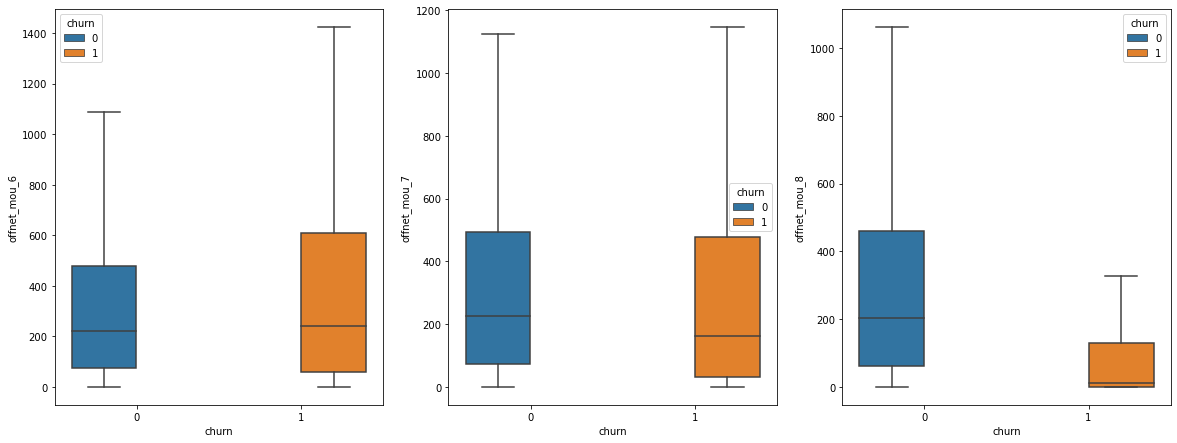

In [70]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

Clearly, Offnet usage is significantly lower in August.

#### ONNET usage

In [71]:
onnet_usage_cols = telecom_hv.columns[telecom_hv.columns.str.contains('onnet.*mou',regex=True)]

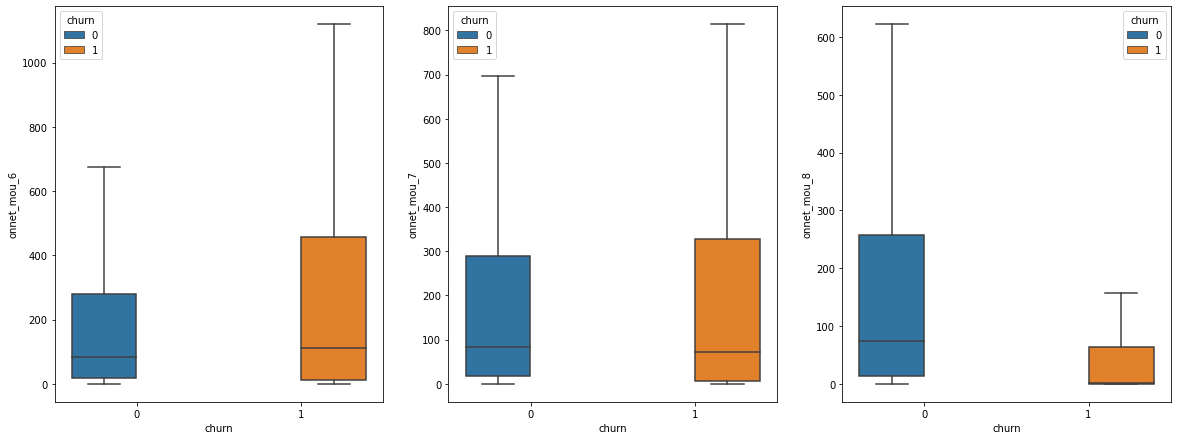

In [72]:
# Onnet mou values for churned and non churned customers
plot_box_chart('onnet_mou')

Clearly, Onnet usage is also significantly lower in August.

In [73]:
#Checking unique value counts throughout the columns
telecom_hv.nunique()

mobile_number                29953
circle_id                        1
loc_og_t2o_mou                   1
std_og_t2o_mou                   1
loc_ic_t2o_mou                   1
arpu_6                       29029
arpu_7                       29040
arpu_8                       28035
onnet_mou_6                  16872
onnet_mou_7                  16973
onnet_mou_8                  15854
offnet_mou_6                 21198
offnet_mou_7                 21233
offnet_mou_8                 20140
roam_ic_mou_6                 4045
roam_ic_mou_7                 3381
roam_ic_mou_8                 3431
roam_og_mou_6                 4742
roam_og_mou_7                 3988
roam_og_mou_8                 3996
loc_og_t2t_mou_6             10416
loc_og_t2t_mou_7             10388
loc_og_t2t_mou_8             10056
loc_og_t2m_mou_6             15607
loc_og_t2m_mou_7             15659
loc_og_t2m_mou_8             15118
loc_og_t2f_mou_6              3089
loc_og_t2f_mou_7              3097
loc_og_t2f_mou_8    

In [74]:
#Dropping columns
telecom_hv = telecom_hv.drop(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
                              'loc_ic_t2o_mou', 'std_og_t2c_mou_6' ,'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
                             'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis = 1)

In [75]:
### Checking the Churn Rate
churn = (sum(telecom_hv['churn'])/len(telecom_hv['churn'].index))*100
churn

8.122725603445398

In [76]:
telecom_hv.shape

(29953, 144)

In [77]:
telecom_hv.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 144 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arpu_6                     float64
 1   arpu_7                     float64
 2   arpu_8                     float64
 3   onnet_mou_6                float64
 4   onnet_mou_7                float64
 5   onnet_mou_8                float64
 6   offnet_mou_6               float64
 7   offnet_mou_7               float64
 8   offnet_mou_8               float64
 9   roam_ic_mou_6              float64
 10  roam_ic_mou_7              float64
 11  roam_ic_mou_8              float64
 12  roam_og_mou_6              float64
 13  roam_og_mou_7              float64
 14  roam_og_mou_8              float64
 15  loc_og_t2t_mou_6           float64
 16  loc_og_t2t_mou_7           float64
 17  loc_og_t2t_mou_8           float64
 18  loc_og_t2m_mou_6           float64
 19  loc_og_t2m_mou_7           float64
 20  loc_o

### Feature Standardisation

In [78]:
telecom_cat = telecom_hv.pop('churn')

In [79]:
# Normalising continuous features
telecom_con=(telecom_hv-telecom_hv.mean())/telecom_hv.std()
telecom_con.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,duration_last_rech_6,duration_last_rech_7,duration_last_rech_8,duration_last_rech_data_6,duration_last_rech_data_7,duration_last_rech_data_8,avg_rech_data_amt,avg_rech_amt,av_rech
0,-0.784248,-0.721508,-0.587664,-0.567357,-0.558089,-0.510833,-0.774375,-0.757771,-0.695297,-0.211201,-0.166762,-0.168676,-0.228736,-0.209656,-0.189784,-0.369379,-0.356303,-0.343470,-0.652667,-0.674799,-0.649468,-0.286742,-0.292683,-0.301895,-0.250055,-0.206563,-0.238106,-0.410648,-0.413738,-0.373486,-0.438573,-0.433284,-0.384619,-0.150665,-0.140747,-0.145039,-0.047397,-0.046269,-0.043624,-0.331361,-0.326461,-0.322771,-0.160925,-0.016036,-0.017389,-0.399797,-0.398079,-0.393033,-0.686090,-0.694756,-0.661285,-0.333988,-0.326136,-0.306098,-0.191599,-0.185700,-0.194989,-0.297239,-0.291698,-0.270090,-0.141191,-0.143464,-0.128810,-0.324503,-0.108619,-0.239995,-0.140657,-0.148216,-0.155897,-0.082533,-0.093807,-0.095844,-0.832961,-0.924743,-0.859797,-0.532893,-0.701731,-0.544115,0.471161,0.439210,0.529582,1.050392,1.075327,1.098519,-0.236380,-0.276655,-0.207841,1.541698,1.505521,1.622422,-0.496012,-0.512719,-0.476351,0.489684,0.422812,0.459028,0.604796,0.541659,0.663397,-0.291806,-0.373426,-0.319824,-0.285550,-0.239919,-0.263418,0.809227,0.782769,0.877210,0.922571,0.891053,1.006557,0.819863,0.808054,0.877302,-0.401069,-0.406661,-0.377731,-0.425467,-0.443964,-0.416092,1.274298,1.168389,1.276510,-0.212551,-0.208845,-0.183923,0.945716,0.931958,1.018967,-0.252003,-0.329773,-0.403504,-0.137970,-0.085051,-0.042605,-0.045167,-0.132463,-0.888517,-0.869995,-0.936392,-0.194184,-0.686817,-0.437431
7,1.107388,1.643005,5.302524,-0.441578,-0.444244,-0.396850,0.164963,0.378506,-0.019115,0.001388,0.274863,0.257858,-0.024563,-0.078694,0.173385,-0.144932,-0.225934,-0.166447,0.580773,1.176302,0.044792,2.519548,2.218568,2.425574,-0.250055,-0.206563,-0.238106,-0.400004,-0.358479,-0.343298,-0.316635,-0.360071,-0.264483,0.404853,1.405012,1.379622,-0.047397,-0.042320,0.180074,-0.075377,-0.326461,-0.002416,-0.160925,-0.016036,-0.017389,-0.044972,-0.205507,-0.222306,0.305879,0.31

In [80]:
telecom_hv = pd.concat([telecom_cat,telecom_con],axis=1)
telecom_hv.shape

(29953, 144)

In [81]:
# look at missing value ratio
round(telecom_hv.isnull().sum()*100/telecom_hv.shape[0],2)

churn                        0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
onnet_mou_7                  0.0
onnet_mou_8                  0.0
offnet_mou_6                 0.0
offnet_mou_7                 0.0
offnet_mou_8                 0.0
roam_ic_mou_6                0.0
roam_ic_mou_7                0.0
roam_ic_mou_8                0.0
roam_og_mou_6                0.0
roam_og_mou_7                0.0
roam_og_mou_8                0.0
loc_og_t2t_mou_6             0.0
loc_og_t2t_mou_7             0.0
loc_og_t2t_mou_8             0.0
loc_og_t2m_mou_6             0.0
loc_og_t2m_mou_7             0.0
loc_og_t2m_mou_8             0.0
loc_og_t2f_mou_6             0.0
loc_og_t2f_mou_7             0.0
loc_og_t2f_mou_8             0.0
loc_og_t2c_mou_6             0.0
loc_og_t2c_mou_7             0.0
loc_og_t2c_mou_8             0.0
std_og_t2t_mou_6             0.0
std_og_t2t_mou_7             0.0
std_og_t2t

## Model Building

In [82]:
#response variable in y
y = telecom_hv.pop('churn')

#predictor variables in X
X = telecom_hv

In [83]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Using SMOTE for Data Imbalance Handling.

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
#using smote
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [86]:
# print shapes of train and test sets
print(X_train_res.shape)
print(y_train_res.shape)
print(X_test.shape)
print(y_test.shape)

(38430, 143)
(38430,)
(8986, 143)
(8986,)


In [87]:
y_test.head()

48388    0
29754    0
50131    0
66630    0
91920    0
Name: churn, dtype: int64

#### Using Random Forest for checking important variables.

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
#using random forest
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [90]:
%%time
rf.fit(X_train_res, y_train_res)

Wall time: 435 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [91]:
#checking out of box score
rf.oob_score_

0.8130106687483737

In [92]:
from sklearn.metrics import plot_roc_curve

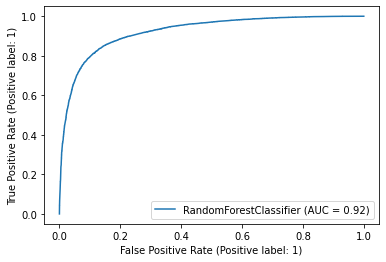

In [93]:
#plotting roc curve
plot_roc_curve(rf, X_train_res, y_train_res)
plt.show()

#### Hypertuning the Model

In [94]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [95]:
#checking with various options
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
# using gridsearchcv for tuning
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [98]:
%%time
grid_search.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 4min 22s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [99]:
#checking best score
grid_search.best_score_

0.9549834191468249

In [100]:
#checking best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

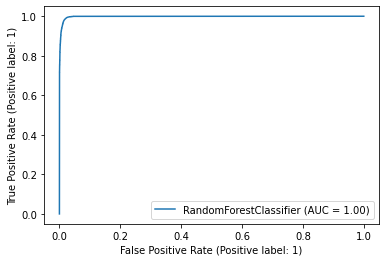

In [101]:
#roc curve
plot_roc_curve(rf_best, X_train_res, y_train_res)
plt.show()

In [102]:
rf_best.feature_importances_

array([3.05268882e-03, 4.34097296e-03, 4.37819552e-02, 3.76443741e-03,
       3.05294128e-03, 1.01342624e-02, 3.15131392e-03, 3.41309590e-03,
       1.48545797e-02, 2.27708522e-03, 5.86007076e-03, 4.55237278e-02,
       2.72889126e-03, 8.01287743e-03, 4.78285429e-02, 2.79206834e-03,
       3.37469341e-03, 1.61992118e-02, 4.18997195e-03, 7.00432518e-03,
       3.47375261e-02, 2.09782303e-03, 2.00239538e-03, 7.46981999e-03,
       1.55860649e-03, 2.12551403e-03, 1.32636136e-03, 4.07609145e-03,
       5.55714682e-03, 3.67402956e-03, 3.65982723e-03, 4.11501433e-03,
       4.27627292e-03, 7.17627411e-04, 7.83539265e-04, 4.55617720e-04,
       1.27430271e-03, 1.67836702e-03, 1.12254816e-03, 3.06393078e-03,
       5.69549234e-03, 4.39378031e-03, 2.35773751e-03, 6.27698220e-05,
       3.42244475e-05, 3.18309471e-03, 3.46546682e-03, 3.15739956e-02,
       4.54547989e-03, 4.55562858e-03, 8.15036572e-02, 2.68491401e-03,
       3.20556361e-03, 1.24515085e-02, 2.96404110e-03, 4.05027211e-03,
      

In [103]:
# creating a dataframe with all features sorted by importance
imp_df = pd.DataFrame({
    "Varname": X_train_res.columns,
    "Imp": rf_best.feature_importances_
})

In [104]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
50,loc_ic_t2m_mou_8,0.081504
136,duration_last_rech_8,0.057070
14,roam_og_mou_8,0.047829
77,total_rech_amt_8,0.045953
11,roam_ic_mou_8,0.045524
83,last_day_rch_amt_8,0.045105
2,arpu_8,0.043782
80,max_rech_amt_8,0.037274
20,loc_og_t2m_mou_8,0.034738
139,duration_last_rech_data_8,0.031796


#### We see an overall AUC score of 1. This looks good.

#### Important Factors influencing Customer churn
1. loc_ic_t2m_mou_8
2. duration_last_rech_8
3. roam_og_mou_8
4. total_rech_amt_8 	
5. roam_ic_mou_8
6. last_day_rch_amt_8

### Using PCA

In [105]:
X_train.shape

(20967, 143)

In [106]:
from sklearn.decomposition import PCA

In [107]:
#running PCA
pca = PCA(random_state=42)

In [108]:
#fitting X_train_res
pca.fit(X_train_res)

PCA(random_state=42)

In [109]:
pca.components_

array([[-5.49769061e-02, -2.47606974e-02,  1.25411454e-02, ...,
         1.33231119e-01, -4.52338805e-02,  1.04308884e-01],
       [ 1.96000363e-01,  2.26667035e-01,  2.06466113e-01, ...,
        -1.25614582e-02,  2.34613697e-01,  7.75014617e-02],
       [ 1.51890228e-02,  1.08209996e-01,  1.25082362e-01, ...,
         7.82711743e-02,  6.92066743e-02,  9.75948224e-02],
       ...,
       [-0.00000000e+00,  4.56895882e-16, -1.33841761e-16, ...,
        -4.93449859e-01, -3.43998302e-01,  5.41275564e-01],
       [-0.00000000e+00, -6.31675470e-17,  1.03140734e-16, ...,
        -3.45063293e-02, -2.75011193e-01,  3.78507208e-02],
       [ 0.00000000e+00,  3.12670630e-16, -1.64809824e-16, ...,
         2.49796581e-01,  5.18313656e-02, -2.74007141e-01]])

In [110]:
#Checking explained variance
pca.explained_variance_ratio_

array([1.28353680e-01, 8.30857893e-02, 5.51838634e-02, 4.70832887e-02,
       4.18291921e-02, 3.73777809e-02, 3.32128864e-02, 2.58422357e-02,
       2.49699626e-02, 2.35861130e-02, 2.06478729e-02, 1.92038847e-02,
       1.86149759e-02, 1.67526158e-02, 1.62616979e-02, 1.55655860e-02,
       1.50377470e-02, 1.40056585e-02, 1.37702962e-02, 1.32168964e-02,
       1.31884918e-02, 1.25508413e-02, 1.21911430e-02, 1.11742716e-02,
       1.05993922e-02, 1.01009612e-02, 1.00802676e-02, 9.20946672e-03,
       9.03475724e-03, 8.74330139e-03, 8.51057927e-03, 8.14085620e-03,
       7.77369054e-03, 7.29939846e-03, 7.20718025e-03, 6.74719961e-03,
       6.53294009e-03, 6.44179879e-03, 6.01002815e-03, 5.75085415e-03,
       5.69395250e-03, 5.56837291e-03, 5.45212477e-03, 5.29644903e-03,
       5.09539844e-03, 5.00408503e-03, 4.50207437e-03, 4.34207720e-03,
       4.16712576e-03, 4.07822011e-03, 3.86305389e-03, 3.71578793e-03,
       3.53905546e-03, 3.44747915e-03, 3.40110927e-03, 3.25140193e-03,
      

In [111]:
#cumulative variance check
var_cumu = np.cumsum(pca.explained_variance_ratio_)

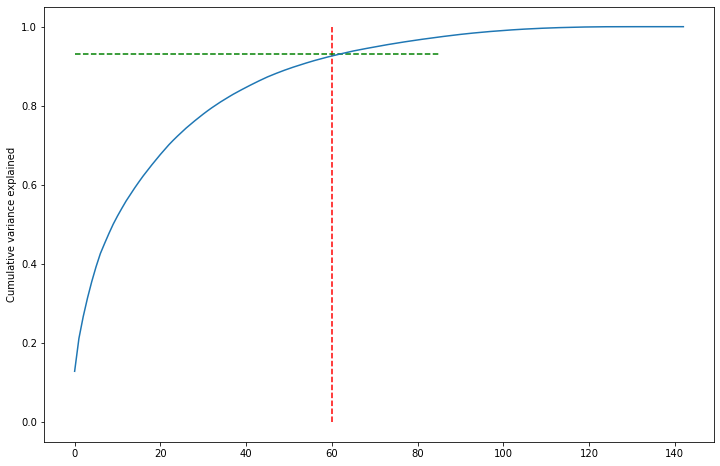

In [112]:
#plotting explained cumulative variance.
fig = plt.figure(figsize=[12,8])
plt.vlines(x= 60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=85, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [113]:
from sklearn.decomposition import IncrementalPCA

In [114]:
#using incremental PCA
pca_final = IncrementalPCA(n_components=60)

In [115]:
df_train_pca = pca_final.fit_transform(X_train_res)

In [116]:
df_train_pca.shape

(38430, 60)

In [117]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [118]:
corrmat.shape

(60, 60)

In [119]:
#transforming X_test
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 60)

### Applying logistic regression on the data on our Principal components

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
learner_pca = LogisticRegression()

In [122]:
model_pca = learner_pca.fit(df_train_pca, y_train_res)

Making predictions on the test set

In [123]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [124]:
from sklearn import metrics

In [125]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

#### This is quite good AUC score. The model seems to be performing well.

#### Strategies to manage customer churn

1. We should give attractive offers and discounts to customers who have less incoming/outgoing calls in the previous month and the duration of last recharge is long.
2. We should focus on High value customers who have lowered the service usage and try to convince them about new offers available.
3. We should define a roadmap for new customers.
4. We should focus more on customer satisfaction and communicate with our customers regularly.
5. Feedback is important. We can ask our customers for feedback more often.